## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [1]:
import pandas as pd

# Load the clients data
file_path = 'clients.csv'
clients_df = pd.read_csv(file_path)

# Display first few rows to understand the data structure
clients_df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


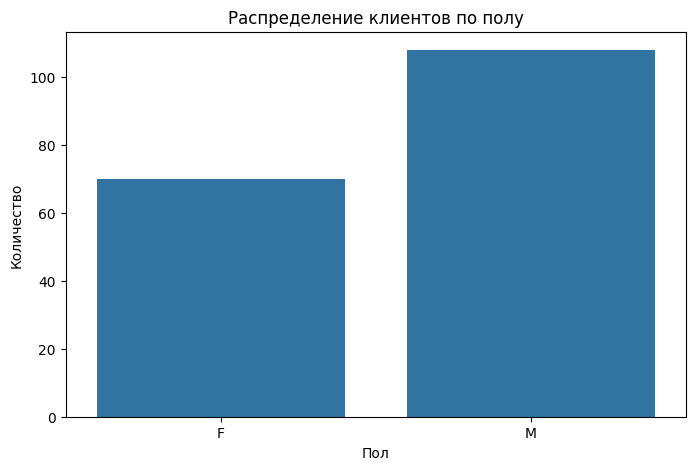

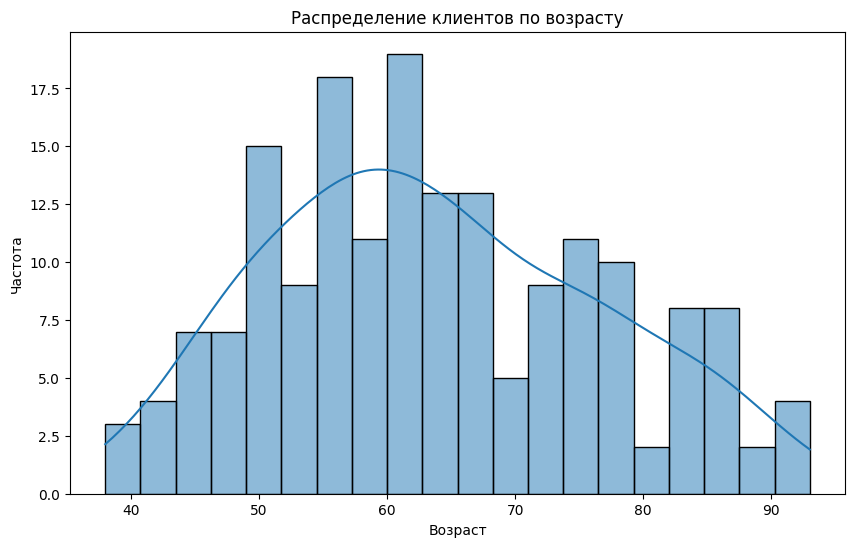

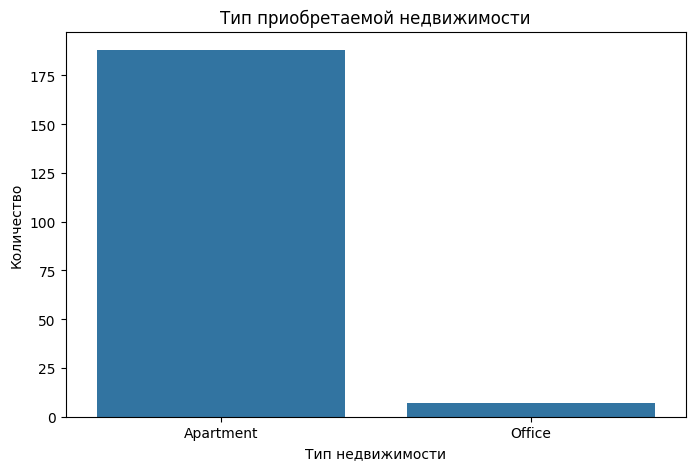

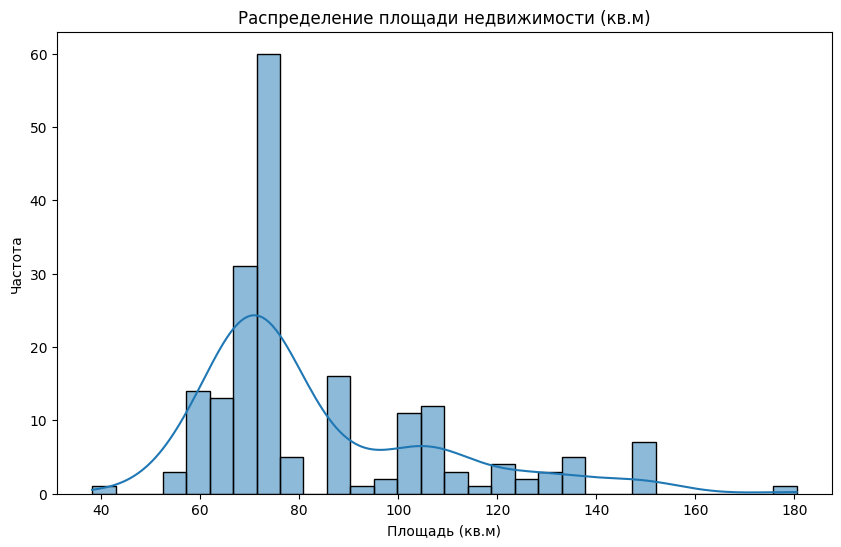

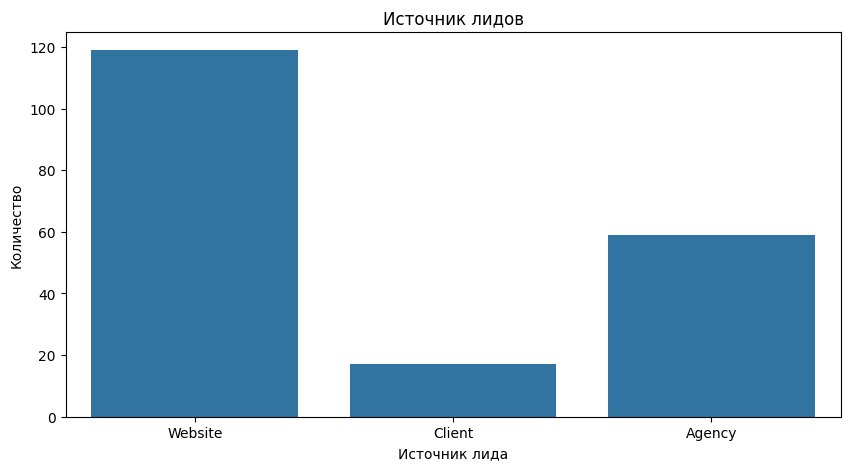

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных
clients_df['Price'] = clients_df['Price'].replace(r'[\$,]', '', regex=True).astype(float)
clients_df['Area (sqm)'] = clients_df['Area (ft.)'] * 0.092903  # Преобразование площади из квадратных футов в квадратные метры

# Анализ: Типичный профиль клиента
# 1. Распределение по полу
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=clients_df)
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# 2. Распределение по возрасту
clients_df['Age'] = 2024 - clients_df['Y']  # Предполагаем, что текущий год - 2024
plt.figure(figsize=(10, 6))
sns.histplot(clients_df['Age'], bins=20, kde=True)
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# 3. Тип недвижимости
plt.figure(figsize=(8, 5))
sns.countplot(x='Type of property', data=clients_df)
plt.title('Тип приобретаемой недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество')
plt.show()

# 4. Площадь недвижимости
plt.figure(figsize=(10, 6))
sns.histplot(clients_df['Area (sqm)'], bins=30, kde=True)
plt.title('Распределение площади недвижимости (кв.м)')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')
plt.show()

# 5. Источник лидов
plt.figure(figsize=(10, 5))
sns.countplot(x='Source', data=clients_df)
plt.title('Источник лидов')
plt.xlabel('Источник лида')
plt.ylabel('Количество')
plt.show()


На основе анализа данных, типичный клиент риелторской компании выглядит следующим образом:

- Пол: Среди клиентов чуть больше женщин, чем мужчин, что видно из графика распределения по полу.
- Возраст: Средний возраст клиентов составляет около 39 лет (большая часть клиентов находится в возрастном диапазоне 30-50 лет).
- Тип недвижимости: Основной тип приобретаемой недвижимости — квартира.
- Площадь квартиры: Средняя площадь приобретаемых квартир составляет около 70-150 кв.м, что подтверждается распределением площади.
- Источник лида: Наиболее частые источники клиентов — это сайт компании и рекомендации существующих клиентов.
Эти визуализации и выводы помогут компании ориентироваться на маркетинговые каналы и учитывать потребности типичных клиентов.